In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [21]:
df = pd.read_csv('/Users/mahinbindra/Downloads/train 4.csv', delimiter=';')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [29]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [30]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [31]:
import matplotlib.pyplot as plt

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='y', ylabel='previous'>

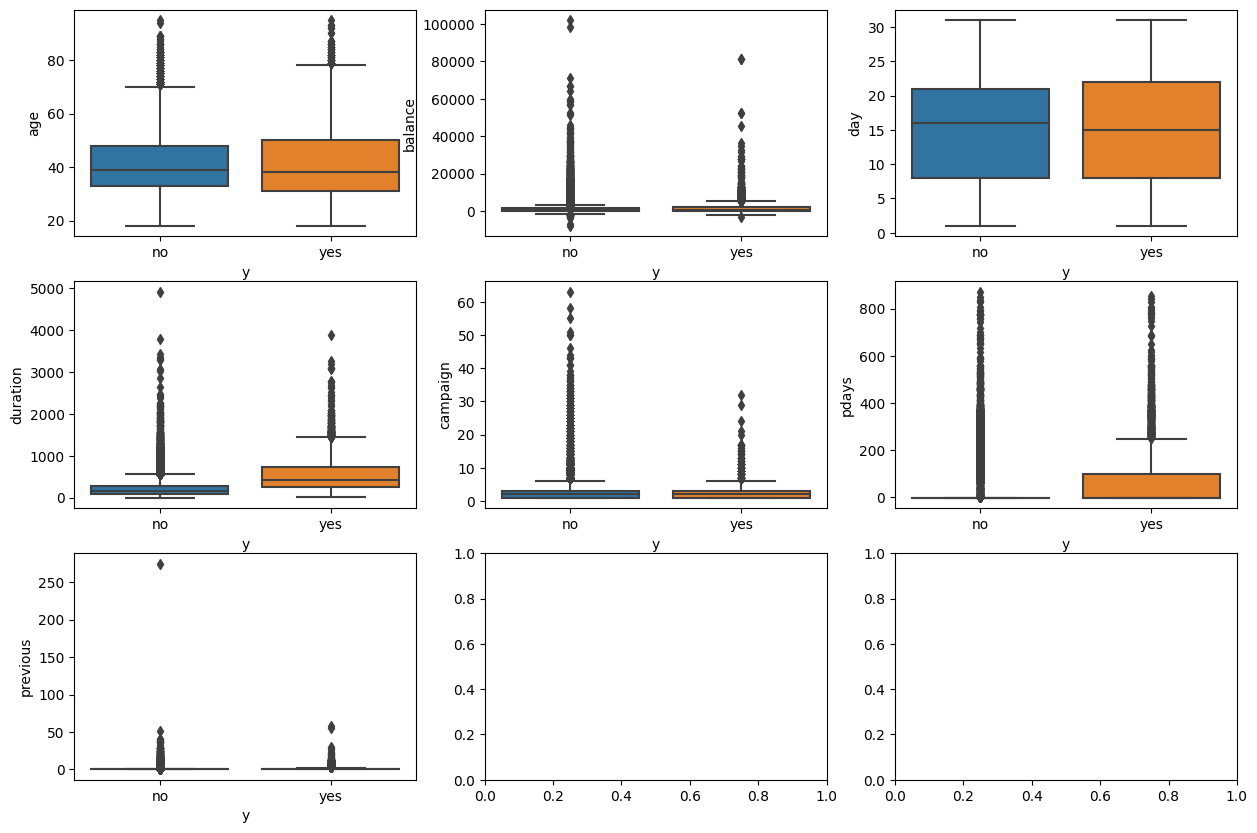

In [33]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
sns.boxplot(y = 'age', x = 'y', data = df, ax = axs[0,0])
sns.boxplot(y = 'balance', x = 'y', data = df, ax = axs[0,1])
sns.boxplot(y = 'day', x = 'y', data = df, ax = axs[0,2])
sns.boxplot(y = 'duration', x = 'y', data = df, ax = axs[1,0])
sns.boxplot(y = 'campaign', x = 'y', data = df, ax = axs[1,1])
sns.boxplot(y = 'pdays', x = 'y', data = df, ax = axs[1,2])
sns.boxplot(y = 'previous', x = 'y', data = df, ax = axs[2,0])

In [44]:
balance_outliers = df[df['balance']>80000]
balance_outliers


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


In [42]:
df2 = df.copy()

In [47]:
outlier_indices = balance_outliers.index

In [48]:
df2.drop(outlier_indices, inplace=True)

In [57]:
df2[df2['duration']>4000]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no


In [58]:
df2.drop(24148, inplace=True)

In [60]:
df2[df2['previous']>250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [61]:
df2.drop(29182, inplace=True)

In [65]:
previous_outliers = df2[df2['previous']>50]
outlier_indices2 = previous_outliers.index

In [66]:
df2.drop(outlier_indices2, inplace=True)

<Axes: xlabel='y', ylabel='previous'>

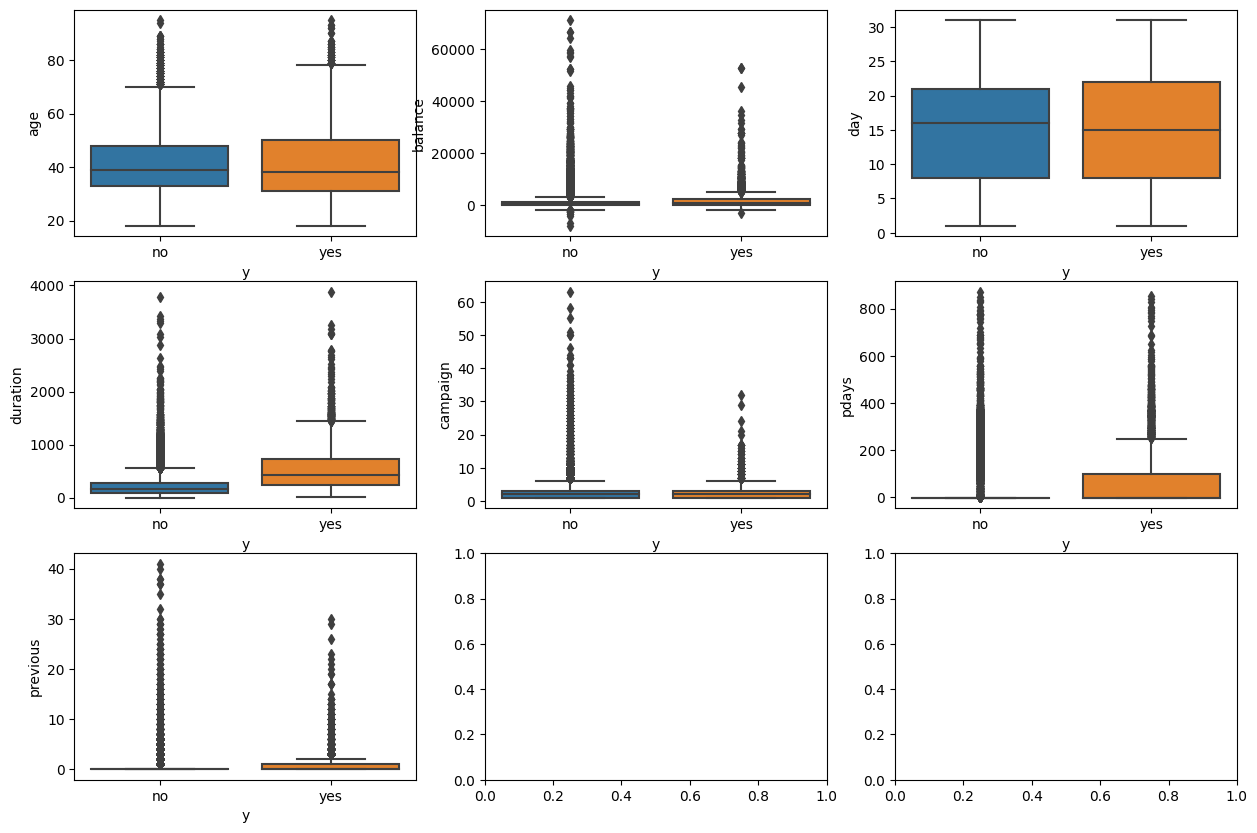

In [67]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
sns.boxplot(y = 'age', x = 'y', data = df2, ax = axs[0,0])
sns.boxplot(y = 'balance', x = 'y', data = df2, ax = axs[0,1])
sns.boxplot(y = 'day', x = 'y', data = df2, ax = axs[0,2])
sns.boxplot(y = 'duration', x = 'y', data = df2, ax = axs[1,0])
sns.boxplot(y = 'campaign', x = 'y', data = df2, ax = axs[1,1])
sns.boxplot(y = 'pdays', x = 'y', data = df2, ax = axs[1,2])
sns.boxplot(y = 'previous', x = 'y', data = df2, ax = axs[2,0])

In [68]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

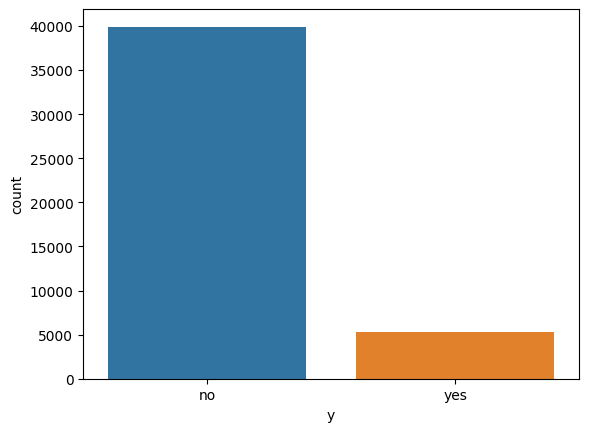

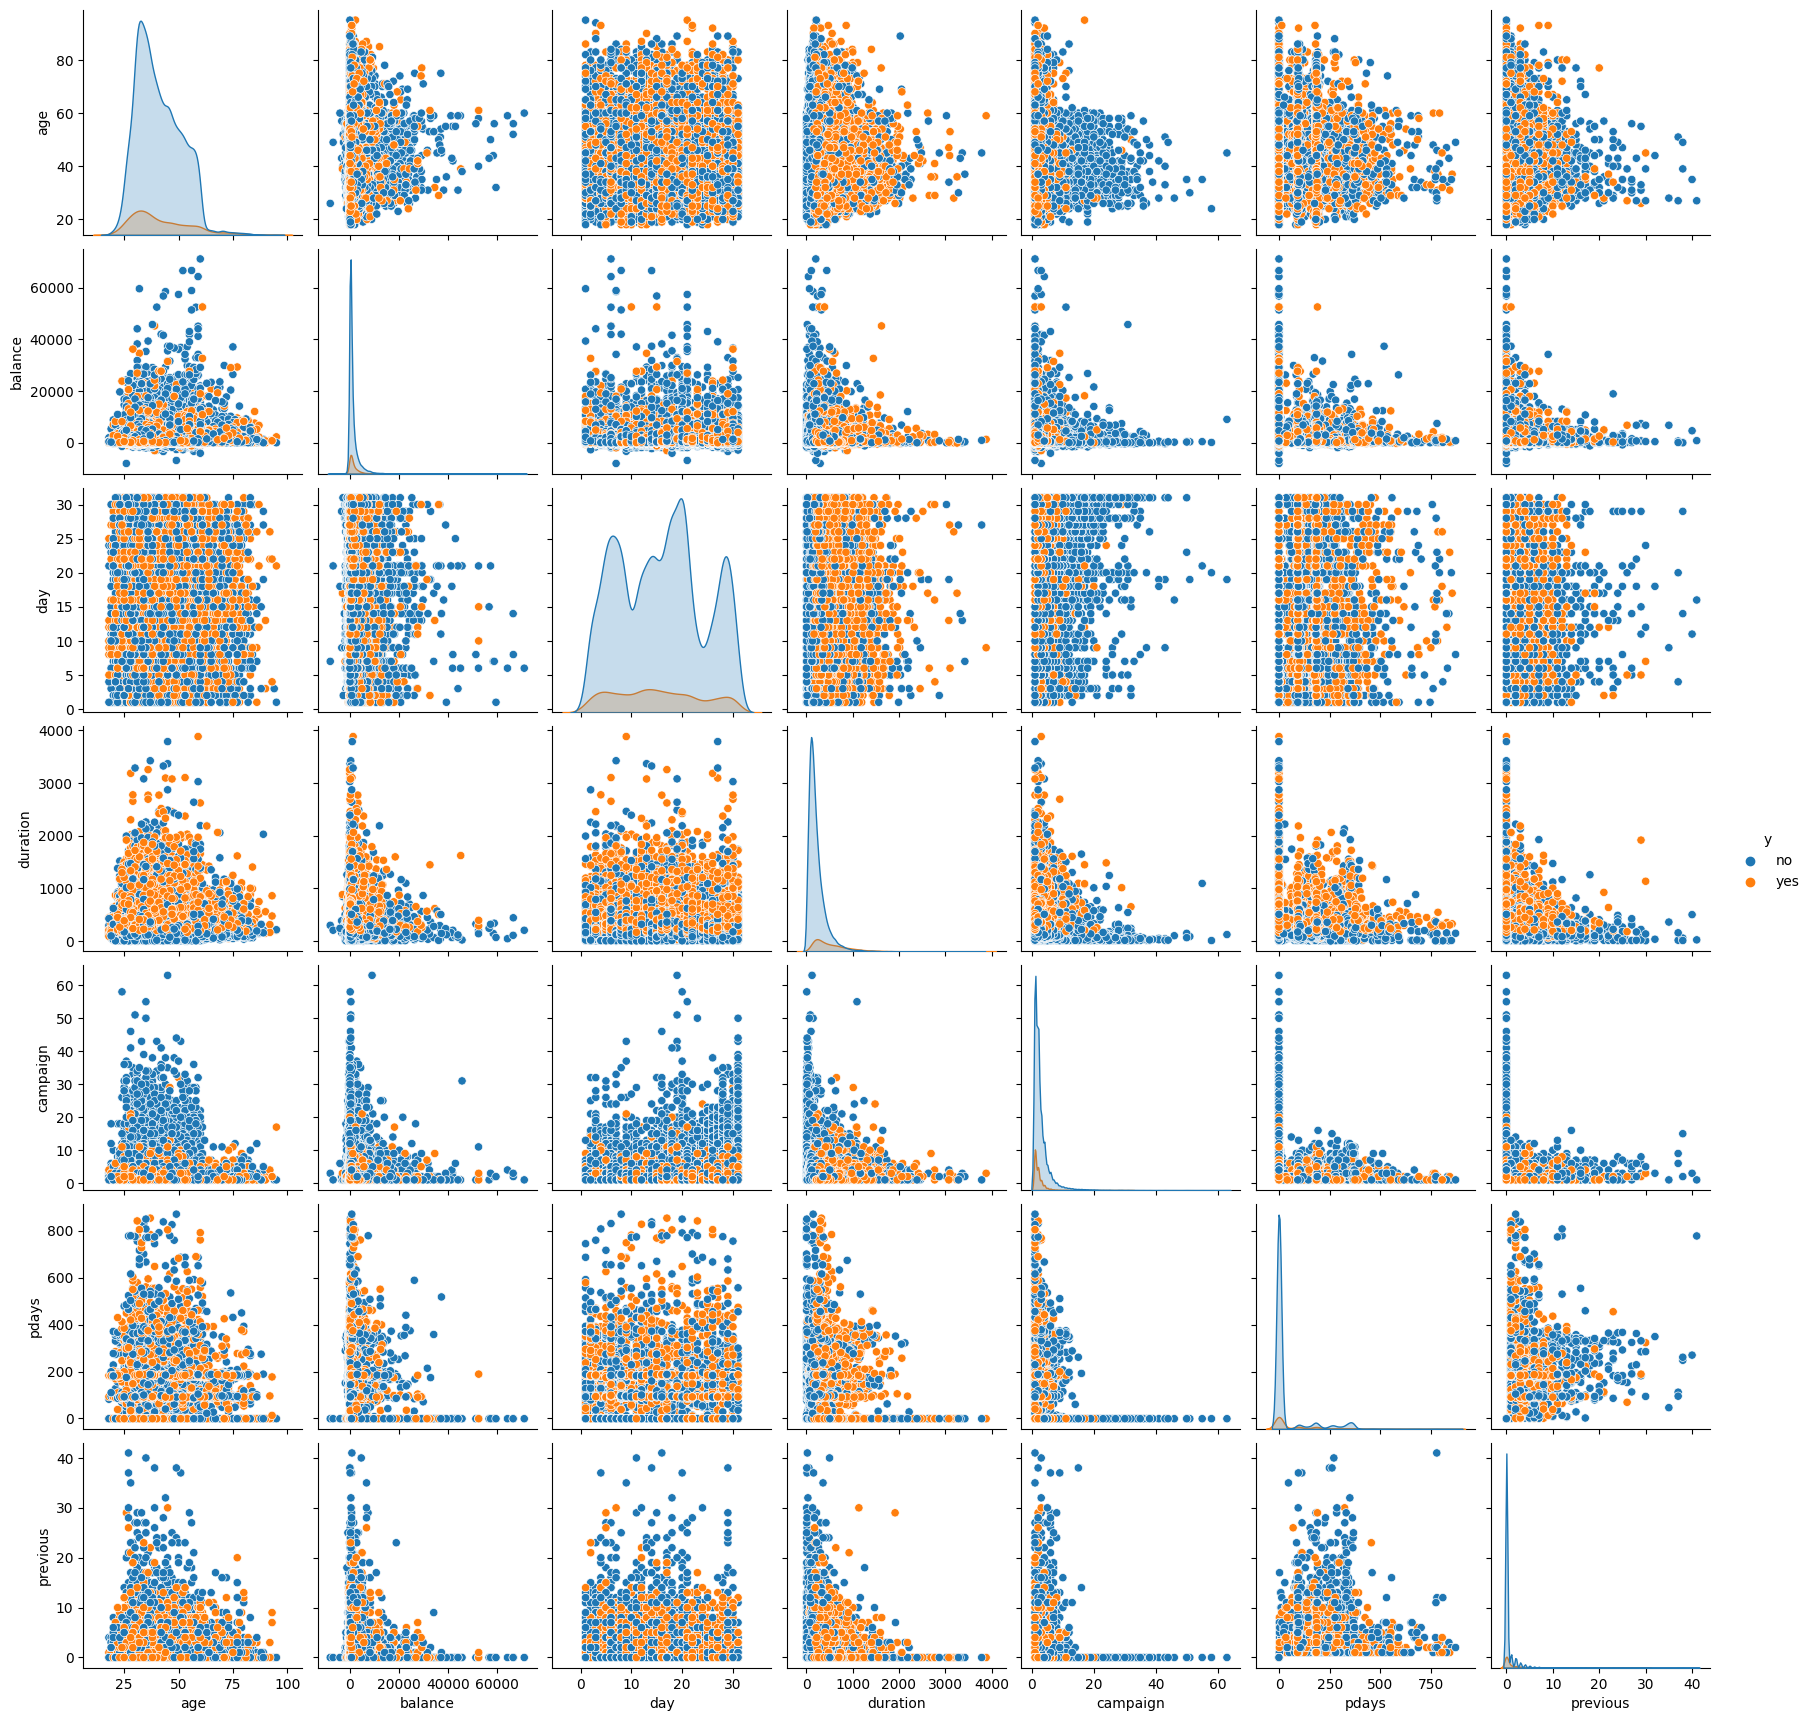

In [69]:
sns.countplot(x='y', data=df2)
plt.show()

# More detailed exploration
sns.pairplot(df2, hue='y')
plt.show()

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45202 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45202 non-null  int64 
 1   job        45202 non-null  object
 2   marital    45202 non-null  object
 3   education  45202 non-null  object
 4   default    45202 non-null  object
 5   balance    45202 non-null  int64 
 6   housing    45202 non-null  object
 7   loan       45202 non-null  object
 8   contact    45202 non-null  object
 9   day        45202 non-null  int64 
 10  month      45202 non-null  object
 11  duration   45202 non-null  int64 
 12  campaign   45202 non-null  int64 
 13  pdays      45202 non-null  int64 
 14  previous   45202 non-null  int64 
 15  poutcome   45202 non-null  object
 16  y          45202 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [71]:
df3 = df2.copy()

In [72]:
df3['ID'] = range(1, len(df3)+1)
df3['ID'].sort_index()

0            1
1            2
2            3
3            4
4            5
         ...  
45206    45198
45207    45199
45208    45200
45209    45201
45210    45202
Name: ID, Length: 45202, dtype: int64

In [73]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'ID'],
      dtype='object')

In [113]:
df3.replace('unknown', pd.NA, inplace=True) 

In [114]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45202 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45202 non-null  int64 
 1   job        44914 non-null  object
 2   marital    45202 non-null  object
 3   education  43345 non-null  object
 4   default    45202 non-null  object
 5   balance    45202 non-null  int64 
 6   housing    45202 non-null  object
 7   loan       45202 non-null  object
 8   contact    32182 non-null  object
 9   day        45202 non-null  int64 
 10  month      45202 non-null  object
 11  duration   45202 non-null  int64 
 12  campaign   45202 non-null  int64 
 13  pdays      45202 non-null  int64 
 14  previous   45202 non-null  int64 
 15  poutcome   8246 non-null   object
 16  y          45202 non-null  object
 17  ID         45202 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


In [117]:
df3['marital'] = df3['marital'].fillna(df3['marital'].mode().iloc[0])
df3['loan'] = df3['loan'].fillna(df3['loan'].mode().iloc[0])
df3['education'] = df3['education'].fillna(df3['education'].mode().iloc[0])
df3['job'] = df3['job'].fillna(df3['job'].mode().iloc[0])
df3['default'] = df3['default'].fillna(df3['default'].mode().iloc[0])
df3['housing'] = df3['housing'].fillna(df3['housing'].mode().iloc[0])
df3['contact'] = df3['contact'].fillna(df3['contact'].mode().iloc[0])
df3['poutcome'] = df3['poutcome'].fillna(df3['poutcome'].mode().iloc[0])

In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45202 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45202 non-null  int64 
 1   job        45202 non-null  object
 2   marital    45202 non-null  object
 3   education  45202 non-null  object
 4   default    45202 non-null  object
 5   balance    45202 non-null  int64 
 6   housing    45202 non-null  object
 7   loan       45202 non-null  object
 8   contact    45202 non-null  object
 9   day        45202 non-null  int64 
 10  month      45202 non-null  object
 11  duration   45202 non-null  int64 
 12  campaign   45202 non-null  int64 
 13  pdays      45202 non-null  int64 
 14  previous   45202 non-null  int64 
 15  poutcome   45202 non-null  object
 16  y          45202 non-null  object
 17  ID         45202 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


In [119]:
df4 = df3.copy()

In [120]:
df4.groupby(['job', 'y'])['ID'].count().unstack()

y,no,yes
job,,
admin.,4540,631
blue-collar,9278,741
entrepreneur,1364,123
housemaid,1131,109
management,8153,1301
retired,1748,514
self-employed,1392,187
services,3785,369
student,669,269


In [121]:
df4.groupby(['marital', 'y'])['ID'].count().unstack()

y,no,yes
marital,,
divorced,4585,622
married,24456,2751
single,10876,1912


In [122]:
df4.groupby(['education', 'y'])['ID'].count().unstack()

y,no,yes
education,,
primary,6260,590
secondary,22357,2699
tertiary,11300,1996


In [123]:
df4.groupby(['default', 'y'])['ID'].count().unstack()

y,no,yes
default,,
no,39154,5233
yes,763,52


In [124]:
df4.groupby(['housing', 'y'])['ID'].count().unstack()

y,no,yes
housing,,
no,16725,3352
yes,23192,1933


In [125]:
df4.groupby(['loan', 'y'])['ID'].count().unstack()

y,no,yes
loan,,
no,33157,4802
yes,6760,483


In [126]:
df4.groupby(['contact', 'y'])['ID'].count().unstack()

y,no,yes
contact,,
cellular,37403,4897
telephone,2514,388


In [127]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45202 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45202 non-null  int64 
 1   job        45202 non-null  object
 2   marital    45202 non-null  object
 3   education  45202 non-null  object
 4   default    45202 non-null  object
 5   balance    45202 non-null  int64 
 6   housing    45202 non-null  object
 7   loan       45202 non-null  object
 8   contact    45202 non-null  object
 9   day        45202 non-null  int64 
 10  month      45202 non-null  object
 11  duration   45202 non-null  int64 
 12  campaign   45202 non-null  int64 
 13  pdays      45202 non-null  int64 
 14  previous   45202 non-null  int64 
 15  poutcome   45202 non-null  object
 16  y          45202 non-null  object
 17  ID         45202 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


In [176]:
categorical_features = ['job', 'marital','education','default', 'loan', 'housing', 'contact']
numerical_features = ['age','duration', 'previous', 'balance']
target = 'y'

In [177]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('categorical_features',cat_transformer, categorical_features),
                                                 ('numerical_features', num_transformer, numerical_features)])

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df4[categorical_features + numerical_features], df4[target],test_size = 0.3, random_state=1234)

In [167]:
#x_train_transformed = preprocessor.fit_transform(X_train)
#x_test_transformed = preprocessor.fit_transform(X_test)

In [168]:
#x_train_transformed.shape

(31641, 29)

In [169]:
#x_test_transformed.shape

(13561, 29)

In [170]:
#encoded_columns = preprocessor.named_transformers_['categorical_features'].get_feature_names_out(categorical_features)
#encoded_columns = encoded_columns.tolist()

In [171]:
#all_feat = numerical_features + encoded_columns
#X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
#X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [179]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [180]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [181]:
results = {}

In [140]:
for name, clf in classifiers.items():
    start_time = time.time()

In [141]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])

In [143]:
df4['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [144]:
X_train_transformed

,age,duration,previous,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_secondary,education_tertiary,default_no,default_yes,loan_no,loan_yes,housing_no,housing_yes,contact_cellular,contact_telephone
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-1.028316,0.440516,-0.304471,-0.393812
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,-0.367520,-0.275418,-0.304471,-0.467342
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.556319,0.315325,-0.304471,-0.451387
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-1.217116,0.538321,0.227781,-0.156227
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.367520,-0.025037,-0.304471,-0.399014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.178721,2.932590,1.824540,0.353281
31637,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.709269,0.823912,-0.304471,-0.336583
31638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.839517,-0.553184,-0.304471,-0.058418
31639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.954073,-0.287154,-0.304471,1.385130


In [148]:
X_test_transformed

,age,duration,previous,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_secondary,education_tertiary,default_no,default_yes,loan_no,loan_yes,housing_no,housing_yes,contact_cellular,contact_telephone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-1.034021,0.237325,-0.314698,-0.006085
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,-0.096340,-0.705161,-0.314698,0.594101
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.658949,-0.755376,0.794783,0.401432
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.002572,0.515435,-0.314698,1.067165
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.310181,0.237325,-0.314698,-0.228548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.028877,-0.782414,-0.314698,-0.070308
13557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.846485,0.113720,-0.314698,-0.114006
13558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.565181,0.519298,-0.314698,-0.490736
13559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.940253,-0.496578,-0.314698,0.952292


In [184]:
pos_label = 'yes'

for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
results_df

,Precision,Recall,F1-Score,Accuracy,Time (s)
K-Nearest Neighbors,0.574007,0.194377,0.290411,0.885407,0.635048
Logistic Regression,0.605455,0.203545,0.304666,0.887914,0.672051
Decision Tree,0.389098,0.379584,0.384282,0.853256,0.344984
Random Forest,0.571757,0.304401,0.397288,0.888578,2.130993
AdaBoost,0.565644,0.281785,0.376173,0.887250,1.879067
Bagging,0.519871,0.295844,0.377094,0.882088,0.999352
Voting,0.601386,0.212103,0.313601,0.887988,1.346292


In [185]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [187]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

pos_label = 'yes'

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df

,Best Params,Precision,Recall,F1-Score,Time (s)
K-Nearest Neighbors,{'classifier__n_neighbors': 50},0.652273,0.175428,0.276493,10.952369
Logistic Regression,{'classifier__C': 0.1},0.609576,0.202323,0.303809,3.709573
Decision Tree,{'classifier__max_depth': 10},0.547904,0.335575,0.416224,3.575472
Random Forest,"{'classifier__max_depth': 20, 'classifier__n_e...",0.585018,0.300733,0.397255,105.938188
AdaBoost,{'classifier__n_estimators': 75},0.575641,0.27445,0.371689,21.395829
Bagging,{'classifier__n_estimators': 20},0.537076,0.309902,0.393023,12.027272
Voting,{'classifier__voting': 'hard'},0.60781,0.218826,0.321798,8.246375
